In [38]:
!pip install -U scikit-learn

In [64]:
import numpy as np
import pandas as pd
import sklearn
import datetime
import matplotlib.pyplot as plt

In [40]:
automobile_df = pd.read_csv('datasets/cars.csv')
automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


## Data cleaning

In [41]:
automobile_df = automobile_df.replace('?', np.nan)
automobile_df.isna().sum() # to count fileds missing values

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [42]:
## To replace missing data by the average of the columns
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())

In [43]:
automobile_df =  automobile_df.dropna() # to remove other Nan

In [44]:
automobile_df.drop(['Model', 'bore', 'stroke', 'compression-ratio'], axis=1, inplace=True) #To remove useless colone

In [45]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [46]:
## there are some wrong value in Year
automobile_df['Year'].str.isnumeric().value_counts()
# On doit donc explorer ces valeurs pour voir ce que l'on peut en faire

True     351
False     36
Name: Year, dtype: int64

In [47]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [48]:
# On utilise donc une expression régulire pour extraire l'année du début de phrase
extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand=False)
automobile_df['Year'] = pd.to_numeric(extr)

In [49]:
## meilleure représentation par age
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']
automobile_df.drop(['Year'], axis=1, inplace=True)

In [50]:
## Pour voir si le dataset à besoin de plus de cleaning 
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [51]:
automobile_df['Cylinders'].str.isnumeric().value_counts()
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [53]:
## On remplace ses valuers par la moyenne de la colone
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']
cmean = cylinders.astype(int).mean()
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [58]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce')
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [62]:
## On doit maintenant netoyer la colone origine
automobile_df['Origin'].unique()
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'),
                                  'US',
                                  automobile_df['Origin'])
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'),
                                  'Japan',
                                  automobile_df['Origin'])
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'),
                                  'Europe',
                                  automobile_df['Origin'])
automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [63]:
automobile_df.to_csv('datasets/cars_processed.csv', index=False)

## Visualisation of cleanded dataset

Text(0, 0.5, 'Miles per gallon')

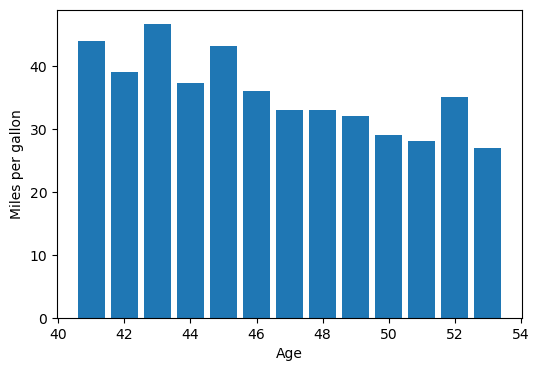

In [66]:
plt.figure(figsize=(6, 4))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

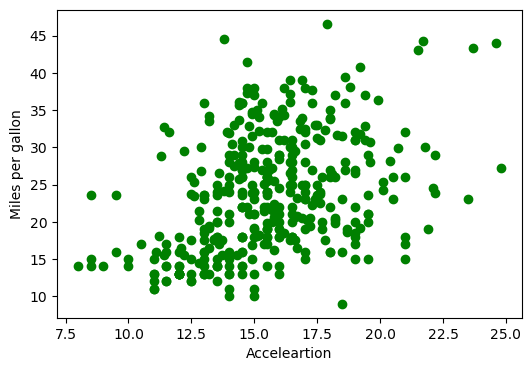

In [69]:
plt.figure(figsize=(6, 4))

plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleartion')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

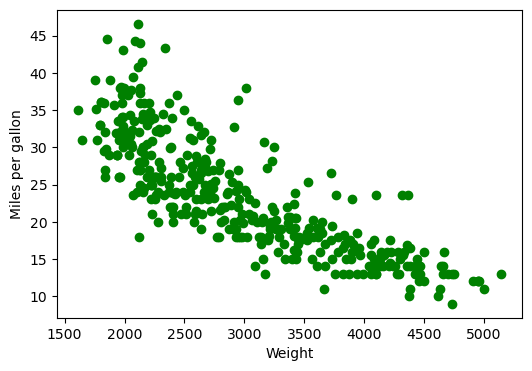

In [70]:
plt.figure(figsize=(6, 4))

plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='g')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

<Axes: xlabel='Weight', ylabel='Acceleration'>

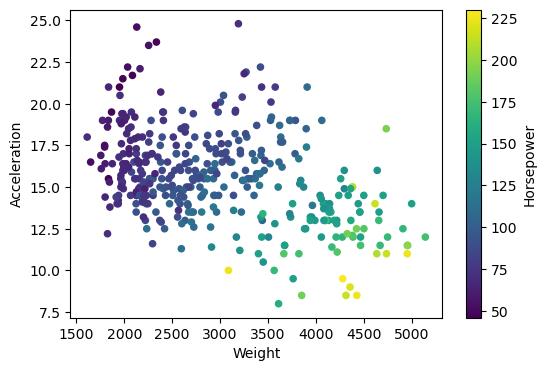

In [71]:
automobile_df.plot.scatter(x='Weight',
                           y='Acceleration',
                           c='Horsepower',
                           colormap='viridis',
                           figsize=(6,4))

In [73]:
## To see the correlation beatween each variable
cars_corr = automobile_df.corr()
cars_corr

C:\Users\bjauseau\AppData\Local\Temp\ipykernel_24120\1321331244.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars_corr = automobile_df.corr()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.746023,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Cylinders,-0.746023,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,-0.788492,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


<Axes: >

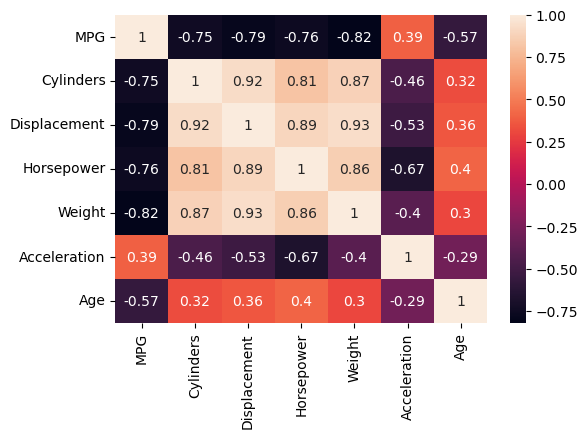

In [74]:
## Heatmap is the best to see corellation
import seaborn as sns

fig, ax, = plt.subplots(figsize = (6,4))
sns.heatmap(cars_corr, annot=True)